

### Linear Regression & Regularization Workflow – ধাপগুলো:

1. **লাইব্রেরি ইমপোর্ট করা**

   * `numpy`, `matplotlib.pyplot` → data তৈরি ও visualization-এর জন্য
   * `LinearRegression`, `Ridge`, `Lasso` → মডেল তৈরির জন্য

2. **Dummy Dataset তৈরি করা**

   * X → feature values 0–10 এর মধ্যে
   * y → `y = 3X + 5 + noise`
   * Data plot করা হয়েছে scatter plot হিসেবে

3. **Linear Regression মডেল ফিট করা**

   * `LinearRegression()` মডেল তৈরি
   * `.fit(X, y)` → training
   * `.predict(X)` → predictions
   * লাল line plot করে Linear Regression fit দেখানো

4. **Ridge ও Lasso Regression প্রয়োগ**

   * Ridge → L2 regularization (`alpha=10`)
   * Lasso → L1 regularization (`alpha=0.5`)
   * মডেল train করা, prediction নেওয়া
   * Linear, Ridge, Lasso একসাথে plot করে comparison

5. **Model Coefficients তুলনা করা**

   * Linear, Ridge, Lasso-এর slope (`coef_`) এবং intercept (`intercept_`) print করা
   * লক্ষ্য করা যায়, regularization অনুযায়ী coefficients একটু shrink বা পরিবর্তিত হয়েছে

---






### লিনিয়ার রিগ্রেশন ব্যাখ্যা (বাংলায়)

**লিনিয়ার রিগ্রেশন** হলো একটি সহজ মেশিন লার্নিং অ্যালগরিদম। এর উদ্দেশ্য হলো স্বাধীন ভেরিয়েবল (X) ও নির্ভরশীল ভেরিয়েবল (y)-এর মধ্যে সম্পর্ক খুঁজে বের করা।

* **Independent variable (X):** ইনপুট বা ফিচার
* **Dependent variable (y):** আউটপুট বা টার্গেট

---

### মূল ধারণা

এটি একটি সরল রেখা (২-ডাইমেনশনে) অথবা হাইপারপ্লেন (উচ্চতর ডাইমেনশনে) ফিট করায় যা X থেকে y অনুমান করে।

---

### রেখার সমীকরণ

$$
y = mX + c
$$

* **m = slope (ঢাল):** রেখা কতটা খাড়া হবে তা নির্দেশ করে
* **c = intercept (অবস্থান):** রেখা y-axis কে কোথায় কাটবে তা নির্দেশ করে

---

### উদাহরণ

যদি পড়াশোনার ঘন্টা (X) বাড়ে, তবে পরীক্ষার নম্বর (y) বাড়বে।

* slope (m): প্রতি অতিরিক্ত ঘন্টায় নম্বর কত বাড়বে
* intercept (c): পড়াশোনা না করলেও ন্যূনতম কত নম্বর পাওয়া যেতে পারে




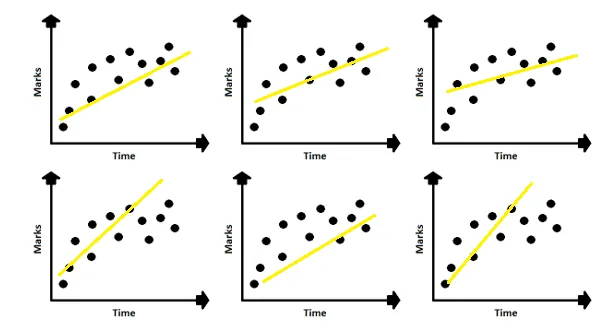

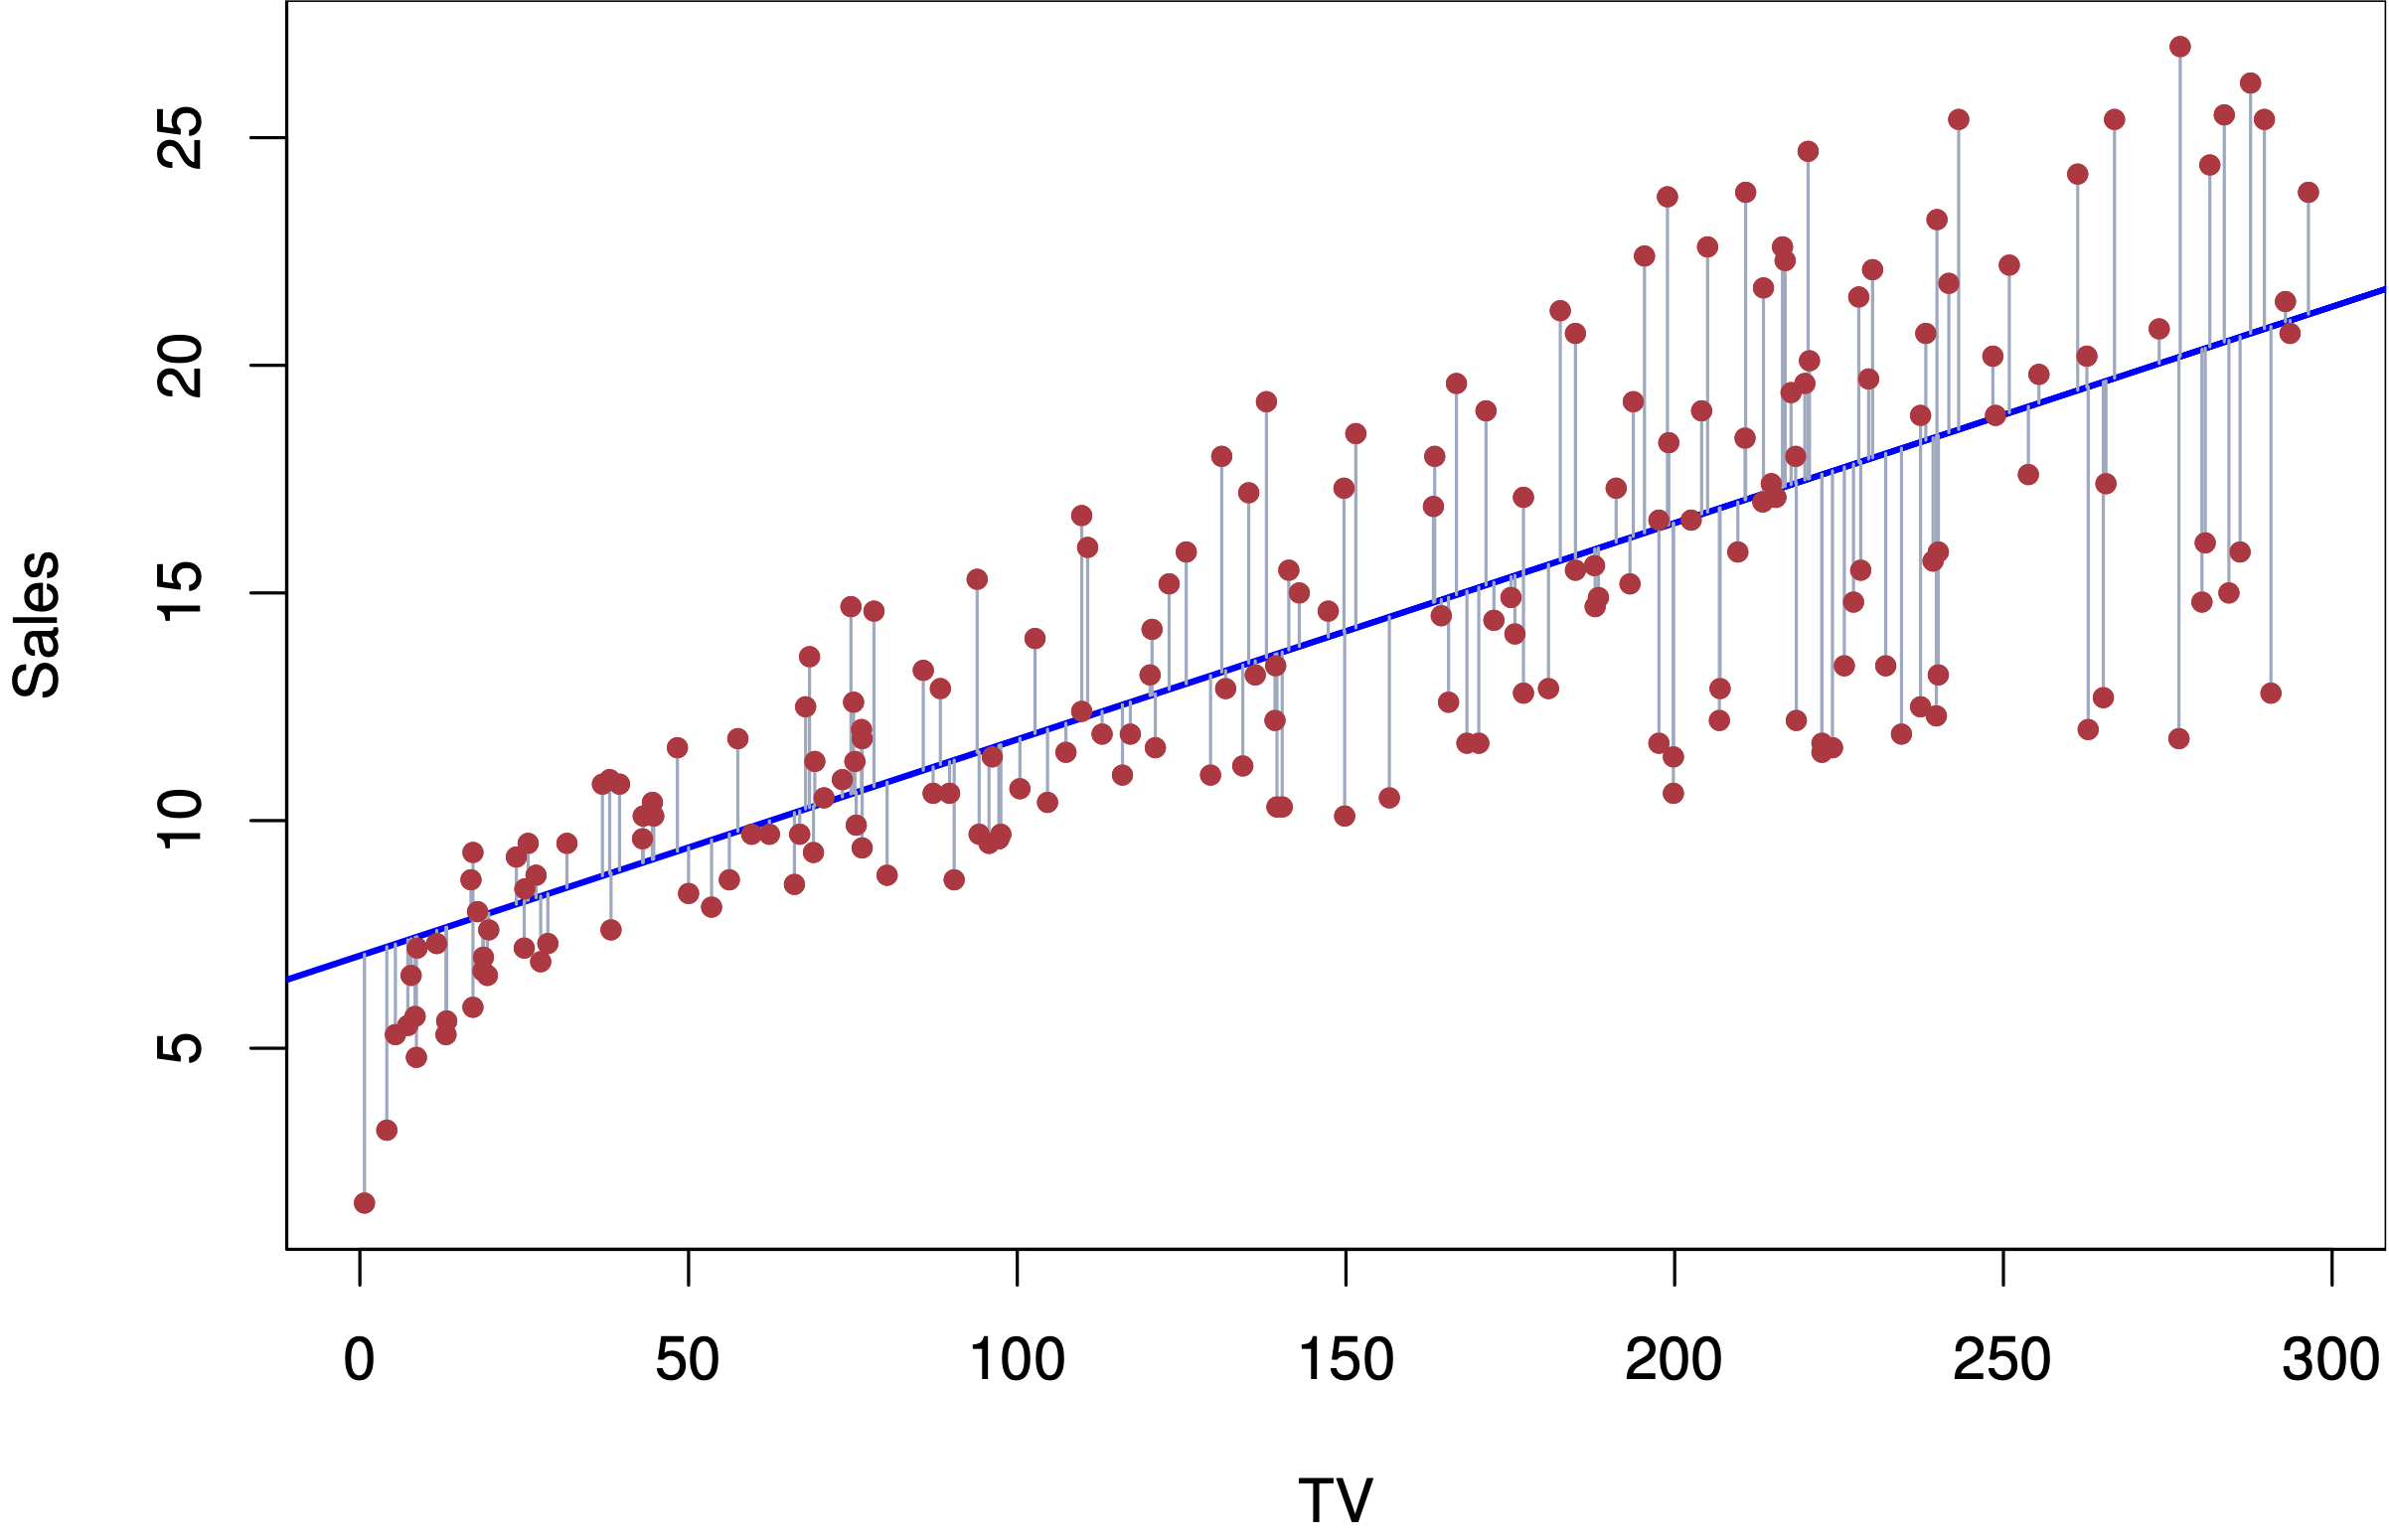

## 1. Introduction to Linear Regression
Linear Regression is one of the simplest algorithms in machine learning.
It tries to model the relationship between independent variables (X) and dependent variable (y).

Equation: y = mX + b, where m = slope, b = intercept.

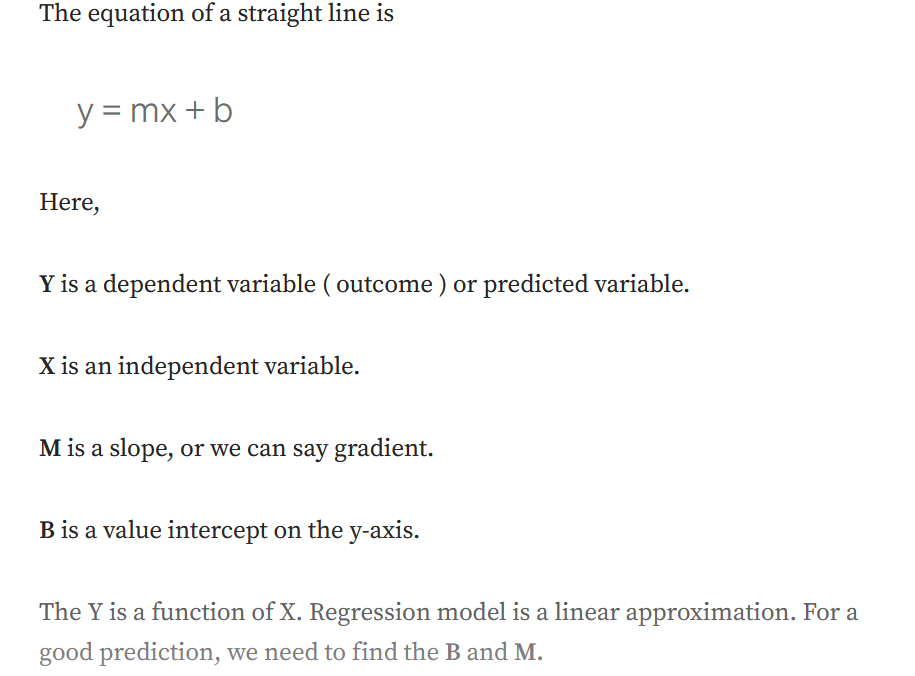

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso

1. **numpy (np):** সংখ্যার array বা গাণিতিক হিসাব করার জন্য ব্যবহার হয়।
2. **matplotlib.pyplot (plt):** ডেটাকে গ্রাফ বা চার্ট আকারে দেখানোর জন্য ব্যবহার হয়।
3. **sklearn.linear\_model থেকে LinearRegression, Ridge, Lasso:**

   * **LinearRegression:** সাধারণ লিনিয়ার রিগ্রেশন মডেল তৈরি করার জন্য।
   * **Ridge:** Regularization (L2 penalty) সহ রিগ্রেশন, ওভারফিটিং কমায়।
   * **Lasso:** Regularization (L1 penalty) সহ রিগ্রেশন, কিছু ফিচার বাদ দিয়ে সরল মডেল বানায়।




# 2. **Create_Dummy_Dataset**

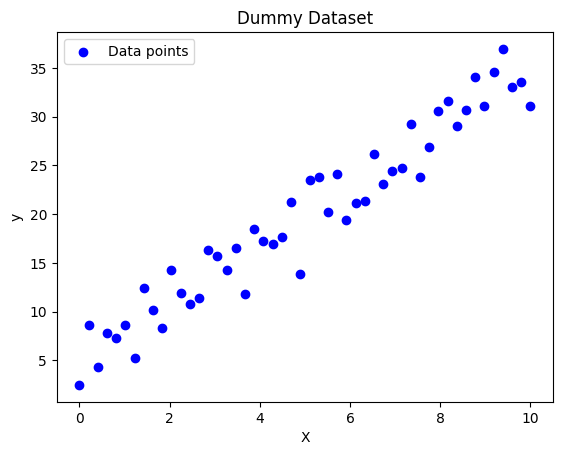

In [2]:
# Generate dummy dataset
np.random.seed(30)  # for reproducibility
X = np.linspace(0, 10, 50).reshape(-1, 1)   # feature values between 0 and 10
y = 3*X.squeeze() + 5 + np.random.randn(50)*2   # true relation + noise

# Plot the data
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Dummy Dataset')
plt.legend()
plt.show()

```python
# Generate dummy dataset
np.random.seed(30)  # for reproducibility
```

* **np.random.seed(30):**

  * র‍্যান্ডম নাম্বার জেনারেশনের জন্য একটা "seed" সেট করা হলো।
  * এতে করে তুমি প্রতিবার কোড চালালেও একই রকম ডেটা পাবে।
  * reproducibility মানে হলো একই কোড থেকে বারবার একই আউটপুট পাওয়া।

---

```python
X = np.linspace(0, 10, 50).reshape(-1, 1)   # feature values between 0 and 10
```

* **np.linspace(0, 10, 50):**

  * 0 থেকে 10 পর্যন্ত সমান দূরত্বে 50টা সংখ্যা তৈরি করে।
  * যেমন: \[0, 0.204, 0.408, ..., 10]

* **reshape(-1, 1):**

  * ডেটাকে কলাম ভেক্টরে রূপান্তর করা।
  * স্কিকিট-লার্ন মডেলগুলো (যেমন LinearRegression) ইনপুটকে 2D আকারে চায়, তাই এখানে reshape করা হয়েছে।
  * এখন X-এর আকার হলো (50,1)।

---

```python
y = 3*X.squeeze() + 5 + np.random.randn(50)*2   # true relation + noise
```

* **X.squeeze():**

  * X-এর মধ্যে (50,1) আকারকে (50,) করে ফেলে। অর্থাৎ এক কলামের array কে সাধারণ ভেক্টরে রূপান্তর করে।

* **3\*X.squeeze() + 5:**

  * আসল সমীকরণ y = 3X + 5 তৈরি করা।
  * মানে slope = 3, intercept = 5।

* \**np.random.randn(50)*2:**

  * র‍্যান্ডম noise যোগ করা হলো যাতে ডেটা পুরোপুরি perfect লাইন না হয়।
  * np.random.randn(50) → normal distribution থেকে ৫০টা র‍্যান্ডম সংখ্যা নেয়।
  * \*2 দিলে noise এর spread আরও বাড়ে।

* ফলে y হলো আসল লাইন (3X+5) + কিছু noise।

---

```python
# Plot the data
plt.scatter(X, y, color='blue', label='Data points')
```

* **plt.scatter(X, y, ...):**

  * X আর y মানগুলোকে scatter plot আকারে (ডট/পয়েন্ট) আঁকা হলো।
  * color='blue' → নীল রঙে পয়েন্টগুলো আঁকা হলো।
  * label='Data points' → লেজেন্ডে নাম দেখাবে।

---

```python
plt.xlabel('X')
plt.ylabel('y')
plt.title('Dummy Dataset')
```

* **plt.xlabel('X'):** গ্রাফের X-axis এর নাম দেওয়া হলো।
* **plt.ylabel('y'):** গ্রাফের Y-axis এর নাম দেওয়া হলো।
* **plt.title('Dummy Dataset'):** গ্রাফের উপরে শিরোনাম দেওয়া হলো।

---

```python
plt.legend()
```

* scatter plot এ দেওয়া label='Data points' লেজেন্ডে দেখাবে।

---

```python
plt.show()
```



# 3. Fit a Simple Linear Regression Model

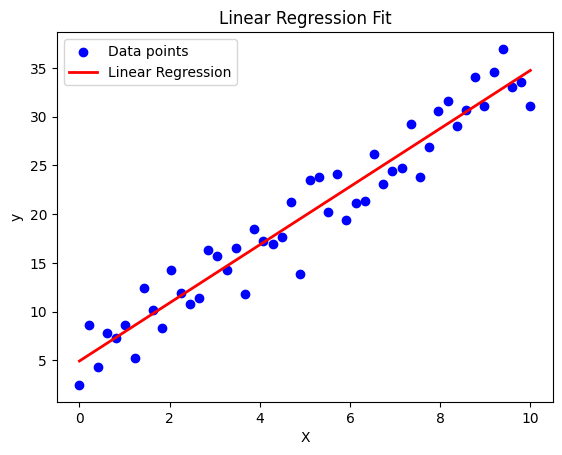

In [3]:
# Train Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)  # fit model to data
y_pred = lin_reg.predict(X)  # predictions on training data

# Plot regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

```python
# Train Linear Regression
lin_reg = LinearRegression()
```

* **LinearRegression():**

  * `sklearn.linear_model` এর LinearRegression ক্লাস ব্যবহার করা হলো।
  * এটা একটা খালি মডেল অবজেক্ট তৈরি করে, যেটাকে পরে ডেটা দিয়ে ট্রেন করানো হবে।
  * এখানে `lin_reg` ভেরিয়েবল দিয়ে মডেলকে রাখা হলো।

---

```python
lin_reg.fit(X, y)  # fit model to data
```

* **fit(X, y):**

  * মডেলকে ডেটা শেখানো হলো।
  * `X` → ইনপুট ফিচার (এখানে পড়াশোনার সময়ের মতো)
  * `y` → আউটপুট বা টার্গেট (যেমন পরীক্ষার নম্বর)
  * মডেল এখান থেকে সেরা slope (m) আর intercept (b) খুঁজে বের করে।

---

```python
y_pred = lin_reg.predict(X)  # predictions on training data
```

* **predict(X):**

  * শেখানো মডেল দিয়ে ইনপুট X এর জন্য y-এর মান প্রেডিক্ট করা।
  * এখানে প্রতিটি X মানের জন্য লাল রেখা (best fit line) এর y মান বের হবে।
  * ফলাফল `y_pred` তে রাখা হলো।

---

```python
# Plot regression line
plt.scatter(X, y, color='blue', label='Data points')
```

* আবার আসল ডেটা পয়েন্টগুলো (X, y) নীল রঙে scatter plot এ আঁকা হলো।

---

```python
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression')
```

* মডেলের প্রেডিক্ট করা রেখা (X বনাম y\_pred) লাল রঙে আঁকা হলো।
* `linewidth=2` → রেখাকে একটু মোটা দেখানোর জন্য।
* `label='Linear Regression'` → লেজেন্ডে নাম দেখাবে।

---

```python
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
```

* X-axis এর নাম: X
* Y-axis এর নাম: y
* গ্রাফের শিরোনাম: "Linear Regression Fit"

---

```python
plt.legend()
plt.show()
```

* লেজেন্ড দেখাবে → ডেটা পয়েন্ট (নীল) আর রিগ্রেশন লাইন (লাল)।
* `plt.show()` → পুরো গ্রাফ প্রদর্শন করবে।



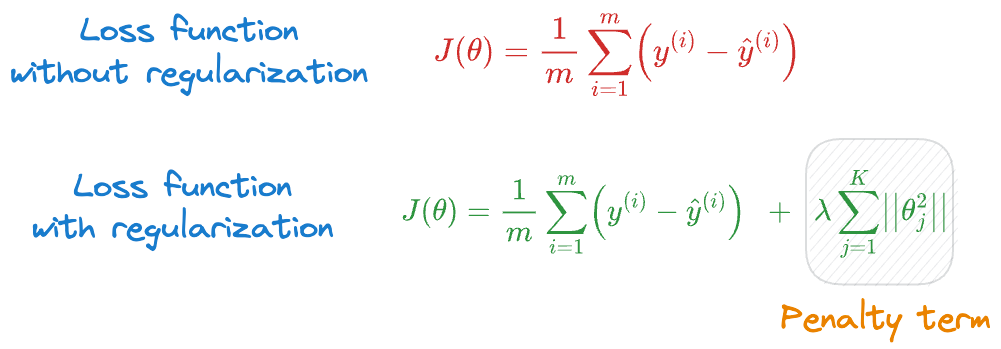

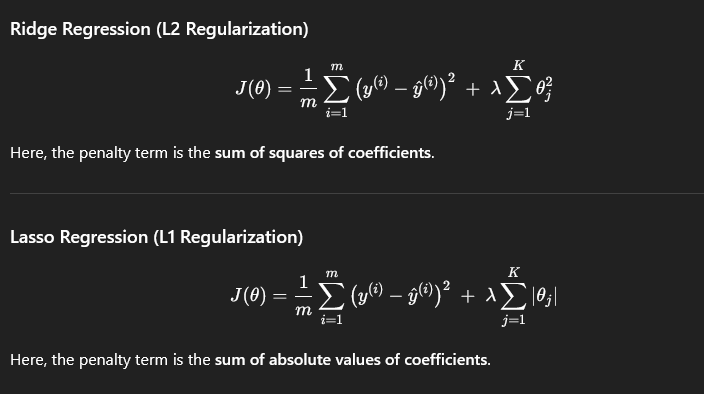

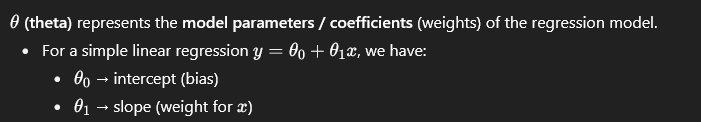

# 4. Ridge and Lasso Regression

1. **Ridge Regression (L2 Regularization)**

* Ridge Regression মূলত **Linear Regression** এর মতো, তবে এতে **L2 penalty** যোগ করা হয়।
* L2 penalty মানে হলো coefficients (slope) এর স্কোয়ার মানকে কমানোর চেষ্টা করা।
* সমীকরণ:

$$
\text{Cost Function} = \text{MSE} + \alpha \sum_{j=1}^{n} w_j^2
$$

* এখানে $\alpha$ হলো **regularization strength**।
* বেশি $\alpha$ দিলে coefficients ছোট হবে → মডেল কম জটিল হবে → overfitting কমবে।
* Ridge কখনো coefficient কে একেবারে 0 করে না, শুধু ছোট করে।

---

#### 2. **Lasso Regression (L1 Regularization)**

* Lasso Regression এ **L1 penalty** ব্যবহার হয়।
* সমীকরণ:

$$
\text{Cost Function} = \text{MSE} + \alpha \sum_{j=1}^{n} |w_j|
$$

* এখানে $\alpha$ হলো regularization strength।
* Lasso এর বিশেষত্ব হলো, এটি কিছু coefficient একেবারে 0 করে দিতে পারে → ফলে অপ্রয়োজনীয় ফিচার বাদ পড়ে যায়।
* এজন্য Lasso কে feature selection method হিসেবেও ব্যবহার করা হয়।

---

#### তুলনা

| পয়েন্ট                | Ridge                          | Lasso                              |
| --------------------- | ------------------------------ | ---------------------------------- |
| Penalty               | L2 (squared)                   | L1 (absolute)                      |
| Coefficient shrinkage | ছোট করে, কিন্তু 0 করে না       | কিছু coefficient একেবারে 0 করে দেয় |
| কাজের ধরন             | Multicollinearity সামলাতে ভালো | Feature selection-এ ভালো           |
| Output                | সব ফিচার রাখে                  | কিছু ফিচার বাদ দিতে পারে           |

---

সংক্ষেপে:

* **Linear Regression** শুধু ডেটা ফিট করে।
* **Ridge Regression** overfitting কমায় coefficients ছোট করে।
* **Lasso Regression** overfitting কমায় এবং অপ্রয়োজনীয় ফিচার বাদ দিয়ে মডেলকে সরল করে।



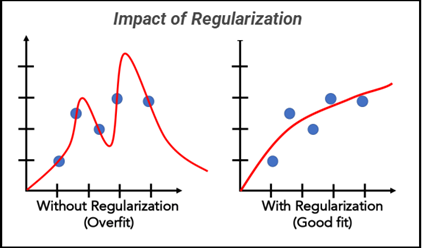

### **Ridge Regression (L2 Regularization)**

* **Penalty:** coefficients-এর **square** মানের উপর শাস্তি যোগ করে।
* **Formula:** $\sum \theta_j^2$
* **Effect:** coefficients গুলোকে 0 এর দিকে ছোট করে, কিন্তু কখনো পুরোপুরি 0 করে না।
* **Use case:** যখন সব ফিচার গুরুত্বপূর্ণ, কিন্তু তাদের প্রভাব একটু কমাতে চাও → overfitting ঠেকাতে সাহায্য করে।
* **সহজভাবে:** সব coefficients রেখে দাও, তবে আকার ছোট করো।

---

### **Lasso Regression (L1 Regularization)**

* **Penalty:** coefficients-এর **absolute value** এর উপর শাস্তি যোগ করে।
* **Formula:** $\sum |\theta_j|$
* **Effect:** কিছু coefficient একেবারে 0 হয়ে যায় → অপ্রয়োজনীয় ফিচার বাদ যায়।
* **Use case:** যখন মনে করো শুধু কিছু ফিচার দরকার, বাকিগুলো অপ্রয়োজনীয় → তখন feature selection স্বয়ংক্রিয়ভাবে হয়ে যায়।
* **সহজভাবে:** শুধু দরকারি coefficients রাখো, বাকি বাদ দাও।

---

### তুলনা

* Ridge: **“সব ফিচার রাখো, কিন্তু প্রভাব কমাও।”**
* Lasso: **“দরকারি ফিচার রাখো, বাকি বাদ দাও।”**



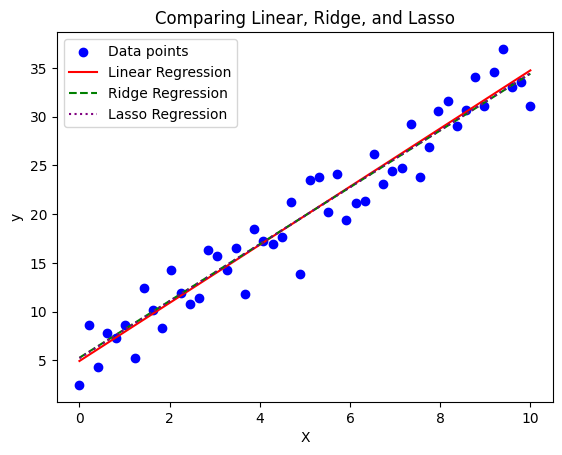

In [4]:
# Train Ridge and Lasso
ridge = Ridge(alpha=10)   # alpha = regularization strength
lasso = Lasso(alpha=0.5)

ridge.fit(X, y)
lasso.fit(X, y)

y_ridge = ridge.predict(X)
y_lasso = lasso.predict(X)

# Compare models visually
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Linear Regression')
plt.plot(X, y_ridge, color='green', linestyle='--', label='Ridge Regression')
plt.plot(X, y_lasso, color='purple', linestyle=':', label='Lasso Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparing Linear, Ridge, and Lasso')
plt.legend()
plt.show()

```python
ridge = Ridge(alpha=10)   # alpha = regularization strength
```

* এখানে আমরা **Ridge Regression মডেল** তৈরি করছি।
* `alpha=10` মানে regularization শক্তিশালী। যত বড় alpha, মডেল তত বেশি shrink করে coefficients।
* Ridge L2 penalty ব্যবহার করে, অর্থাৎ coefficients-এর square যোগ করে loss function-এ।

---

```python
lasso = Lasso(alpha=0.5)
```

* এখানে **Lasso Regression মডেল** তৈরি হচ্ছে।
* `alpha=0.5` মানে medium regularization।
* Lasso L1 penalty ব্যবহার করে → coefficient-এর absolute value যোগ করে।
* Lasso কিছু coefficient **শূন্য** করতে পারে → feature selection হয়।

---

```python
ridge.fit(X, y)
```

* Ridge মডেলটিকে **training data** `(X, y)` এর উপর ফিট করা হচ্ছে।
* মডেল শিখে নিচ্ছে X এবং y-এর মধ্যে relationship।

---

```python
lasso.fit(X, y)
```

* Lasso মডেলটিকে training data-তে ফিট করা হচ্ছে।
* একই data দিয়ে Ridge এবং Lasso শিখছে, তাই পরে তুলনা করা সহজ।

---

```python
y_ridge = ridge.predict(X)
```

* এখন Ridge মডেল ব্যবহার করে **predicted y values** তৈরি করা হচ্ছে।
* মূল dataset-এর উপর prediction করা হচ্ছে, যাতে আমরা visual comparison করতে পারি।

---

```python
y_lasso = lasso.predict(X)
```

* Lasso মডেল ব্যবহার করে predicted y values তৈরি হচ্ছে।
* Ridge এবং Lasso prediction দুটো আলাদা curve দেখাবে।

---

```python
plt.scatter(X, y, color='blue', label='Data points')
```

* এখানে মূল **data points** plot করা হচ্ছে।
* নীল রঙে দেখানো হচ্ছে এবং label দেওয়া হয়েছে `"Data points"`।

---

```python
plt.plot(X, y_pred, color='red', label='Linear Regression')
```

* Linear Regression model-এর prediction line plot করা হচ্ছে।
* লাল রঙে দেখানো হবে।
* এই লাইন কোনো regularization ছাড়া সাধারণ linear regression।

---

```python
plt.plot(X, y_ridge, color='green', linestyle='--', label='Ridge Regression')
```

* Ridge regression prediction line plot করা হচ্ছে।
* সবুজ dashed line দিয়ে দেখানো হচ্ছে।
* দেখাবে Ridge কিভাবে linear regression থেকে slightly আলাদা হয়েছে।

---

```python
plt.plot(X, y_lasso, color='purple', linestyle=':', label='Lasso Regression')
```

* Lasso regression prediction line plot করা হচ্ছে।
* পাপড়ি (dotted) line দিয়ে দেখানো হচ্ছে।
* Lasso কিছু coefficients shrink করলে curve flatten হতে পারে।

---

```python
plt.xlabel('X')
plt.ylabel('y')
```

* X এবং y axis-এর label দেওয়া হচ্ছে।

---

```python
plt.title('Comparing Linear, Ridge, and Lasso')
```

* Plot-এর শিরোনাম দেওয়া হচ্ছে।

---

```python
plt.legend()
```

* সব label দেখানোর জন্য legend add করা হচ্ছে।
* Data points, Linear, Ridge, Lasso line গুলো আলাদা চিহ্নিত হবে।

---

```python
plt.show()
```

* Plot display করা হচ্ছে।
* সব কিছু visualize হবে।




# *5. Model Coefficients*

In [5]:
print('Linear Regression Coef:', lin_reg.coef_, 'Intercept:', lin_reg.intercept_)
print('Ridge Coef:', ridge.coef_, 'Intercept:', ridge.intercept_)
print('Lasso Coef:', lasso.coef_, 'Intercept:', lasso.intercept_)

Linear Regression Coef: [2.98302416] Intercept: 4.927092523868595
Ridge Coef: [2.91578948] Intercept: 5.263265899572454
Lasso Coef: [2.9253771] Intercept: 5.215327817986239


```python
print('Linear Regression Coef:', lin_reg.coef_, 'Intercept:', lin_reg.intercept_)
```

* এখানে **Linear Regression-এর coefficients এবং intercept** print করা হচ্ছে।
* `lin_reg.coef_` → মডেল শিখেছে X এর প্রতি feature এর weight (slope)।
* `lin_reg.intercept_` → মডেলের intercept (y-axis cut point)।
* উদাহরণ: যদি X এক মাত্রা থাকে, তাহলে slope দেখাবে line কত ঢালু।

---

```python
print('Ridge Coef:', ridge.coef_, 'Intercept:', ridge.intercept_)
```

* এখানে **Ridge Regression-এর coefficients এবং intercept** print করা হচ্ছে।
* `ridge.coef_` → Ridge regularization প্রয়োগের পর feature-এর weight।
* লক্ষ্য করো, Ridge-এর coefficient সাধারণ Linear Regression-এর চেয়ে কিছুটা shrink (ছোট) হবে।
* `ridge.intercept_` → Ridge model-এর intercept।

---

```python
print('Lasso Coef:', lasso.coef_, 'Intercept:', lasso.intercept_)
```

* এখানে **Lasso Regression-এর coefficients এবং intercept** print করা হচ্ছে।
* `lasso.coef_` → Lasso regularization প্রয়োগের পর feature-এর weight।
* কিছু coefficient **শূন্যে shrink** হতে পারে (feature selection)।
* `lasso.intercept_` → Lasso model-এর intercept।

---

💡 **সংক্ষেপে:**

* Linear Regression → কোন regularization নেই
* Ridge → coefficients সামান্য shrink হয় (L2 penalty)
* Lasso → কিছু coefficient শূন্য হতে পারে (L1 penalty)
* এই print statement গুলো ব্যবহার করে তুমি দেখতে পারবে **কোন মডেল কীভাবে coefficients পরিবর্তন করেছে**।


